In [1]:
# for datasets in sim 3- counts are generated so that the ratios are close the real data noise level 2 

In [2]:
# Order of correlations: [rho_alpha_beta, rho_alpha_nu, rho_alpha_gamma, rho_beta_nu, rho_beta_gamma, rho_nu_gamma]
# Order of sigmas : [sigma_log_alpha, sigma_log_beta, sigma_log_nu, sigma_log_gamma]
# Order of means : [alpha,beta,nu,gamma]

# config_simulation = {'parameters':{ 'n_obs':800,
#     'n_vars':300,
#     'alpha':5,
#     'beta':0.02,
#     'nu' :0.33,
#     'gamma':0.32,
#     'alpha_':0,
#     't_max':20,
#     'noise_model':"normal",
#     'noise_level':2,
#     }, 

#     'options': {'generate_parameters':False,
#                 'generate_switch_times':True,
#                   'save':False,
#                   'saving_path':None
#                   },
#     }


# config_preprocessing = {'preprocess_params': {
#      'min_counts': 200, 
#      'min_cells': 5,
#      'n_neighbors': 23,
#      'n_pcs': 0,
#      'min_dist': 1},
# 'functions_to_apply': {'filter_cells': True, 
#                        'filter_genes': True, 
#                        'normalize_total': True,
#                        'log1p': True,
#                        'pca': True,
#                        'neighbors': True,
#                        'umap': True,
#                        'leiden': True,
#                        'moments': True}}


# # config_velocity = { 'velocity_types': ['dynamical','deterministic','stochastic','velovi']}
# config_velocity = { 'velocity_types': ['deterministic','stochastic','dynamical']}



# config_plotting = {
#     'colorsets': ['leiden', 'clusters'],
#     'velocity_embedding_stream': True,
#     'velocity_embedding_grid': True,
#     'velocity_embedding': True,
#     'rank_velocity_genes': True,
#     'velocity_confidence': True,
#     'velocity_length': True
# }



In [3]:
import os
from pathlib import Path
import sys
import numpy as np
import scvelo as scv

In [4]:
notebook_dir = os.getcwd()
notebook_dir

'c:\\Users\\OmerCagatayTalikaci\\Desktop\\github\\STVelo\\notebooks\\analysis\\nu_beta_effects'

In [5]:
Path(notebook_dir).parents[3]

WindowsPath('c:/Users/OmerCagatayTalikaci/Desktop/github')

In [6]:
os.chdir(Path(notebook_dir).parents[3])

In [7]:
stvelo_path = os.path.join(os.getcwd(),'STVelo','stvelo')

import sys  
sys.path.insert(1,stvelo_path)

from pipelines.metrics import *
from pipelines.utils import proportions_nuc_cyto

# Read adatas 

In [8]:
adata_folder_path = os.path.join(os.getcwd(), 'data', 'beta_small') 

In [9]:
import os
import anndata as ad


# Initialize an empty dictionary to store the AnnData objects
adata_dict = {}

# Loop through all files in the folder
for file_name in os.listdir(adata_folder_path):
    # Check if the file has .h5ad extension
    if file_name.endswith('.h5ad'):
        # Remove the file extension to use as the dictionary key
        key = os.path.splitext(file_name)[0]
        
        # Read the .h5ad file and store it in the dictionary
        adata_dict[key] = scv.read(os.path.join(adata_folder_path, file_name))

# Now, adata_dict contains the .h5ad files with keys as their filenames without extension


In [10]:
adatas = {k:v.copy() for k,v in adata_dict.items()}

# n_obs = 800

In [11]:
import matplotlib.pyplot as plt 

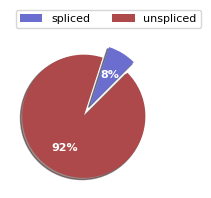

In [12]:
scv.pl.proportions(adata_dict['adata_s_u_800obs_300genes_deterministic'])

<Axes: >

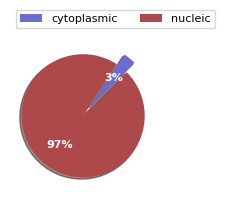

In [13]:
proportions_nuc_cyto(adata_dict['adata_n_c_800obs_300genes_deterministic'])

In [14]:
adata_dict['adata_n_c_800obs_300genes_deterministic'].var['velocity_genes'].value_counts()

velocity_genes
False    239
True      61
Name: count, dtype: int64

In [15]:
adata_dict['adata_s_u_800obs_300genes_deterministic'].var['velocity_genes'].value_counts()

velocity_genes
False    211
True      89
Name: count, dtype: int64

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


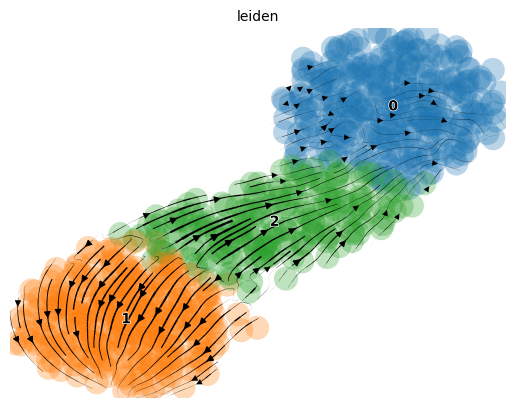

In [16]:
scv.pl.velocity_embedding_stream(adata_dict['adata_s_u_800obs_300genes_deterministic'], basis='umap', color='leiden')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


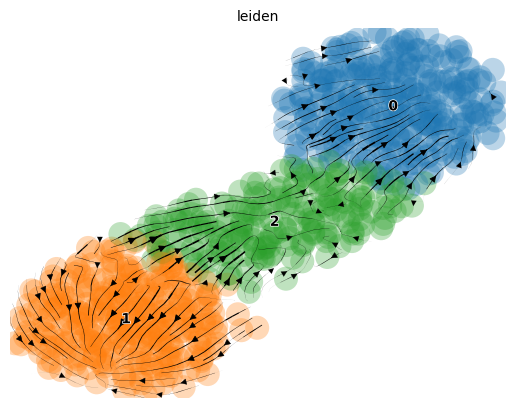

In [42]:
scv.pl.velocity_embedding_stream(adata_dict['adata_n_c_800obs_300genes_deterministic'], basis='umap', color='leiden')

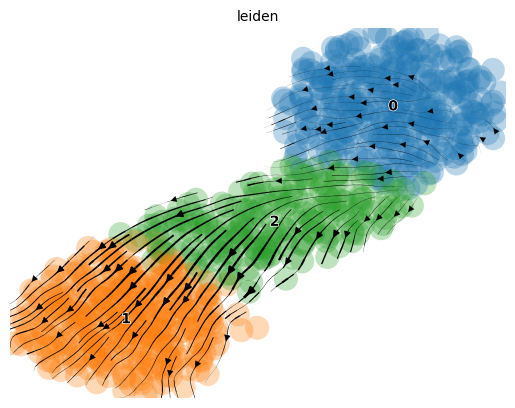

In [43]:
scv.pl.velocity_embedding_stream(adata_dict['adata_n_c_800obs_300genes_dynamical'], basis='umap', color='leiden')

# Metrics 

# Confidence 

- Confidence metric measures the mean velocity consistency by calculating the pearson correlation between a cell and its neighbours. Let $v(x_j)$ be the velocity of cell $x_j$. Confidence $c_j$ is given by;

$$c_j = \frac{1}{k} \sum_{x \in \mathit{N_k(x_j)} } corr(v(x_j),v(x))$$

where $\mathit{N_k(x_j)}$ is the k-neighbours of $x_j$ in KNN graph.


sc.pp.neighbors(adata) > scv.tl.velocity() > scv.tl.velocity_graph() to compute cosine corr. > scv.tl.velocity_confidence()

In [18]:
for d in adata_dict.keys():
    print(d)
    adata_dict[d]=compute_confidence(adata_dict[d])

adata_n_c_1000obs_300genes_deterministic
computing velocity graph (using 2/24 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
adata_n_c_1000obs_300genes_dynamical
computing velocity graph (using 2/24 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
adata_n_c_1000obs_300genes_stochastic
computing velocity graph (using 2/24 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> adde

<Axes: xlabel='Velocity confidence', ylabel='velo_type'>

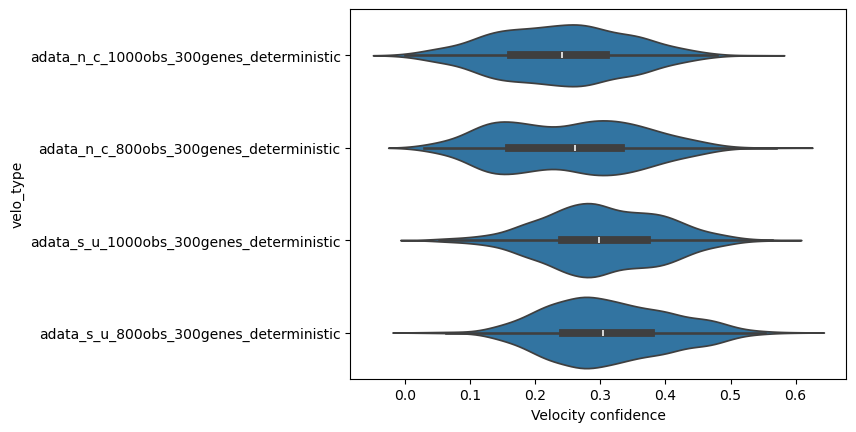

In [19]:
import seaborn as sns
confidences=get_confidences(adata_dict)
sns.violinplot(data=confidences[confidences['velo_type'].str.endswith("deterministic")],x='Velocity confidence',y='velo_type')

<Axes: xlabel='Velocity confidence', ylabel='velo_type'>

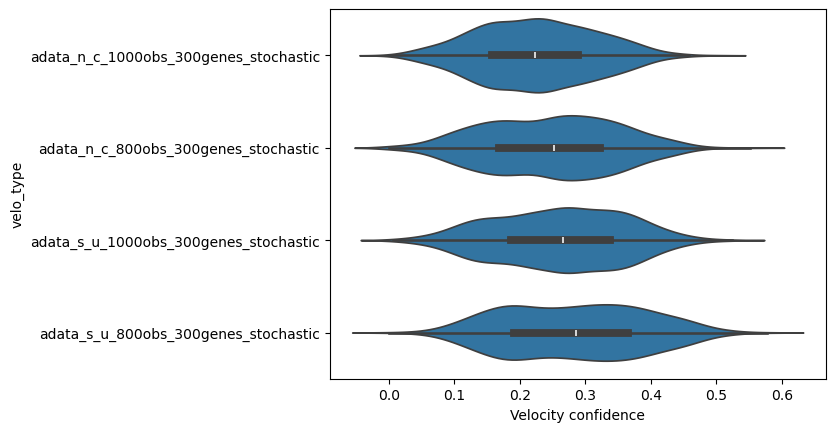

In [20]:
import seaborn as sns
confidences=get_confidences(adata_dict)
sns.violinplot(data=confidences[confidences['velo_type'].str.endswith("stochastic")],x='Velocity confidence',y='velo_type')

<Axes: xlabel='Velocity confidence', ylabel='velo_type'>

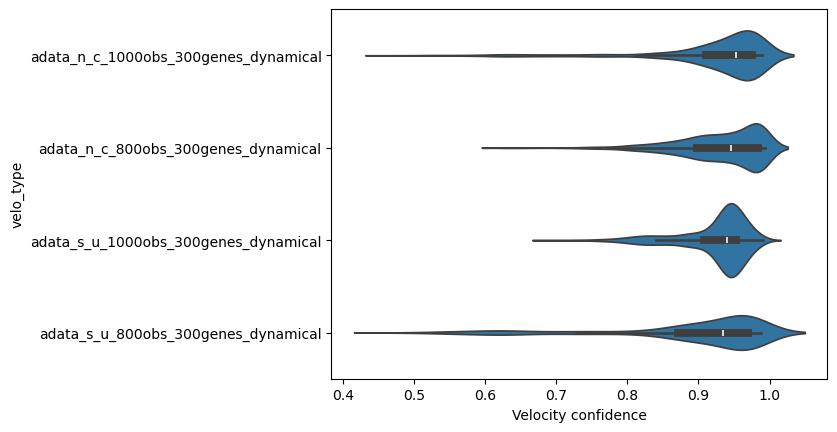

In [21]:
import seaborn as sns
confidences=get_confidences(adata_dict)
sns.violinplot(data=confidences[confidences['velo_type'].str.endswith("dynamical")],x='Velocity confidence',y='velo_type')

In [22]:
import matplotlib.pyplot as plt

# Velocity Correlation by gene

Checks if the velocities calculated for the same gene in different modalities are consistent. 

In [23]:
[adata_dict[k] for k in ['adata_s_u_800obs_300genes_deterministic','adata_n_c_800obs_300genes_deterministic']]

[AnnData object with n_obs × n_vars = 800 × 300
     obs: 'true_t', 'n_counts', 'leiden', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'Velocity confidence'
     var: 'true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_gamma', 'true_scaling', 'n_cells', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
     uns: 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'leiden_colors'
     obsm: 'X_pca', 'X_umap', 'velocity_umap'
     varm: 'PCs'
     layers: 'Ms', 'Mu', 'spliced', 'spliced_cyt', 'true_velocity', 'unspliced', 'velocity'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 800 × 300
     obs: 'true_t', 'n_counts', 'leiden', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'Velocity confidence'
     var: 'true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_g

In [24]:
adata_dict.keys()

dict_keys(['adata_n_c_1000obs_300genes_deterministic', 'adata_n_c_1000obs_300genes_dynamical', 'adata_n_c_1000obs_300genes_stochastic', 'adata_n_c_800obs_300genes_deterministic', 'adata_n_c_800obs_300genes_dynamical', 'adata_n_c_800obs_300genes_stochastic', 'adata_s_u_1000obs_300genes_deterministic', 'adata_s_u_1000obs_300genes_dynamical', 'adata_s_u_1000obs_300genes_stochastic', 'adata_s_u_800obs_300genes_deterministic', 'adata_s_u_800obs_300genes_dynamical', 'adata_s_u_800obs_300genes_stochastic'])

In [25]:
adata_800 = {'adata_n_c_800obs_300genes_deterministic': adata_dict['adata_n_c_800obs_300genes_deterministic'].copy(),
             'adata_s_u_800obs_300genes_deterministic': adata_dict['adata_s_u_800obs_300genes_deterministic'].copy(),
             'adata_s_u_800obs_300genes_stochastic': adata_dict['adata_s_u_800obs_300genes_stochastic'].copy(),
             'adata_n_c_800obs_300genes_stochastic': adata_dict['adata_n_c_800obs_300genes_stochastic'].copy(),
             'adata_s_u_800obs_300genes_dynamical': adata_dict['adata_s_u_800obs_300genes_dynamical'].copy(),
             'adata_n_c_800obs_300genes_dynamical': adata_dict['adata_n_c_800obs_300genes_dynamical'].copy()
             }

In [26]:
velocity_correlation_by_gene=velocity_corr_against_reference(adata_800,reference='adata_s_u_800obs_300genes_deterministic', mode= 'by_gene')

In [27]:
velocity_correlation_by_gene

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
adata_n_c_800obs_300genes_deterministic,0.985789,0.974232,0.980213,0.985346,0.987353,0.980589,0.989791,0.968503,0.958553,0.986417,...,0.99177,0.990472,0.977871,0.992141,0.983251,0.990229,0.988504,0.950897,0.929283,0.957035
adata_s_u_800obs_300genes_deterministic,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
adata_s_u_800obs_300genes_stochastic,1.000000,0.977696,1.000000,1.000000,1.000000,0.979187,1.000000,0.952961,0.971599,1.000000,...,1.00000,1.000000,0.974739,1.000000,1.000000,1.000000,1.000000,0.980941,0.958618,0.969452
adata_n_c_800obs_300genes_stochastic,0.985789,0.974232,0.980213,0.985346,0.987353,0.980589,0.989791,0.901078,0.922162,0.986417,...,0.99177,0.990472,0.943015,0.992141,0.983251,0.990229,0.988504,0.962930,0.900381,0.914152
adata_s_u_800obs_300genes_dynamical,NaN,0.769065,NaN,NaN,NaN,0.728549,NaN,0.762342,0.357065,NaN,...,NaN,NaN,0.594304,NaN,NaN,NaN,NaN,0.608570,0.280274,0.761191
adata_n_c_800obs_300genes_dynamical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592095,0.703496,NaN,...,NaN,NaN,0.788187,NaN,NaN,NaN,NaN,0.815781,0.692710,0.437698


In [28]:
velocity_correlation_by_gene.iloc[1:]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
adata_s_u_800obs_300genes_deterministic,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
adata_s_u_800obs_300genes_stochastic,1.000000,0.977696,1.000000,1.000000,1.000000,0.979187,1.000000,0.952961,0.971599,1.000000,...,1.00000,1.000000,0.974739,1.000000,1.000000,1.000000,1.000000,0.980941,0.958618,0.969452
adata_n_c_800obs_300genes_stochastic,0.985789,0.974232,0.980213,0.985346,0.987353,0.980589,0.989791,0.901078,0.922162,0.986417,...,0.99177,0.990472,0.943015,0.992141,0.983251,0.990229,0.988504,0.962930,0.900381,0.914152
adata_s_u_800obs_300genes_dynamical,NaN,0.769065,NaN,NaN,NaN,0.728549,NaN,0.762342,0.357065,NaN,...,NaN,NaN,0.594304,NaN,NaN,NaN,NaN,0.608570,0.280274,0.761191
adata_n_c_800obs_300genes_dynamical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592095,0.703496,NaN,...,NaN,NaN,0.788187,NaN,NaN,NaN,NaN,0.815781,0.692710,0.437698


Text(0, 0.5, 'Modality')

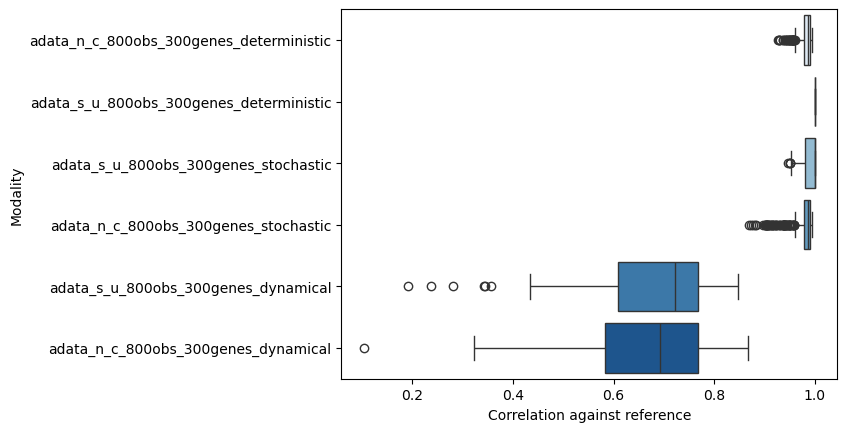

In [29]:
# velocity corr against a reference 
# import matplotlib.pyplot as plt
# sns.clustermap(velocity_correlation_by_gene.fillna(0),figsize=(7,4),cmap='Blues')
# sns.scatterplot(velocity_correlation_by_gene[:1].T)
# plt.figure(figsize=(5,5))
sns.boxplot(data=velocity_correlation_by_gene.stack().reset_index(),y='level_0',x=0,palette='Blues')
plt.xlabel('Correlation against reference')
plt.ylabel('Modality')


- It looks like the model capture more or less the same dynamics for the genes in two modalities. Investigate lover correlations:

In [30]:
velo_genes_s_u = adata_800['adata_s_u_800obs_300genes_deterministic'].var['velocity_genes']
velo_genes_n_c = adata_800['adata_n_c_800obs_300genes_deterministic'].var['velocity_genes']

In [31]:
print(velo_genes_n_c.value_counts(),velo_genes_s_u.value_counts())

velocity_genes
False    239
True      61
Name: count, dtype: int64 velocity_genes
False    211
True      89
Name: count, dtype: int64


In [32]:
adata_dict['adata_s_u_800obs_300genes_deterministic'].var[adata_dict['adata_s_u_800obs_300genes_deterministic'].var['velocity_genes']==False].head()

,true_t_,true_alpha,true_beta,true_nu,true_gamma,true_scaling,n_cells,velocity_gamma,velocity_qreg_ratio,velocity_r2,velocity_genes
0,9.222708,5.0,0.02,0.33,0.32,1.0,792,8.614139,8.614139,-0.878850,False
2,10.011994,5.0,0.02,0.33,0.32,1.0,791,9.011839,9.011839,-0.514973,False
3,9.146825,5.0,0.02,0.33,0.32,1.0,792,9.159743,9.159743,-1.742841,False
4,7.316382,5.0,0.02,0.33,0.32,1.0,795,9.010730,9.010730,-5.705643,False
6,7.551241,5.0,0.02,0.33,0.32,1.0,793,8.981451,8.981451,-4.130892,False


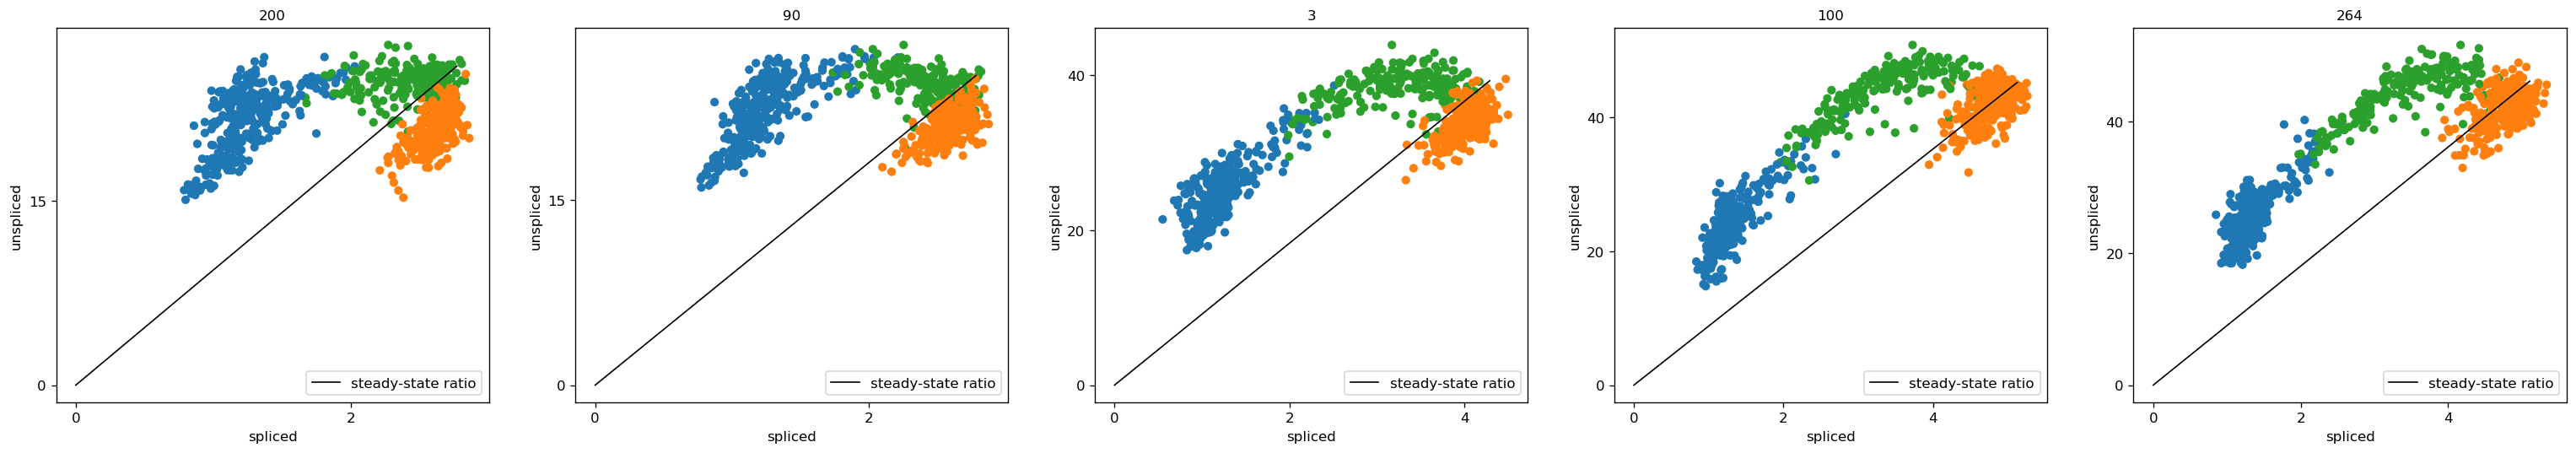

In [33]:
scv.pl.scatter(adata_dict['adata_s_u_800obs_300genes_deterministic'],color="leiden", basis=['200','90','3','100','264'], ncols=5, frameon=True,dpi=120,)

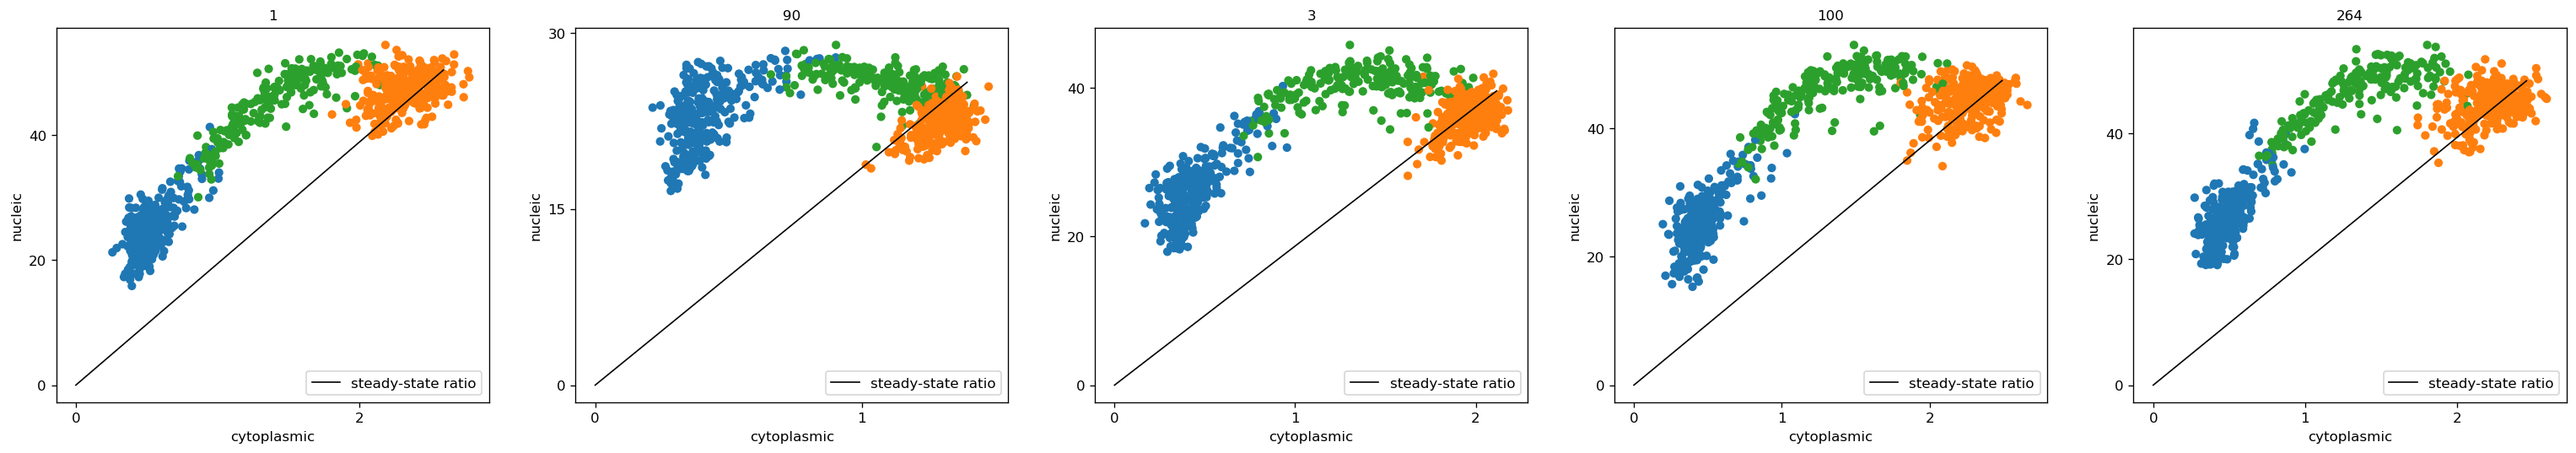

In [34]:
scv.pl.scatter(adata_dict['adata_n_c_800obs_300genes_deterministic'],color="leiden", basis=['1','90','3','100','264'], ncols=5, frameon=True,dpi=120,ylabel='nucleic',xlabel='cytoplasmic')

# Check the important genes 

In [35]:
scv.tl.rank_velocity_genes(adata_dict['adata_s_u_800obs_300genes_deterministic'], groupby='leiden', min_corr=.3)
scv.tl.rank_velocity_genes(adata_dict['adata_n_c_800obs_300genes_deterministic'], groupby='leiden', min_corr=.3)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [36]:
dfs = scv.get_df(adata_dict['adata_s_u_800obs_300genes_deterministic'].uns['rank_velocity_genes']['names'])
dfs.head(5)

,0,1,2
0,271,164,7
1,168,210,42
2,281,270,155
3,279,52,17
4,297,103,177


In [37]:
dfn = scv.get_df(adata_dict['adata_n_c_800obs_300genes_deterministic'].uns['rank_velocity_genes']['names'])
dfn.head(5)

,0,1,2
0,271,164,7
1,116,270,68
2,221,210,13
3,254,143,165
4,281,52,111


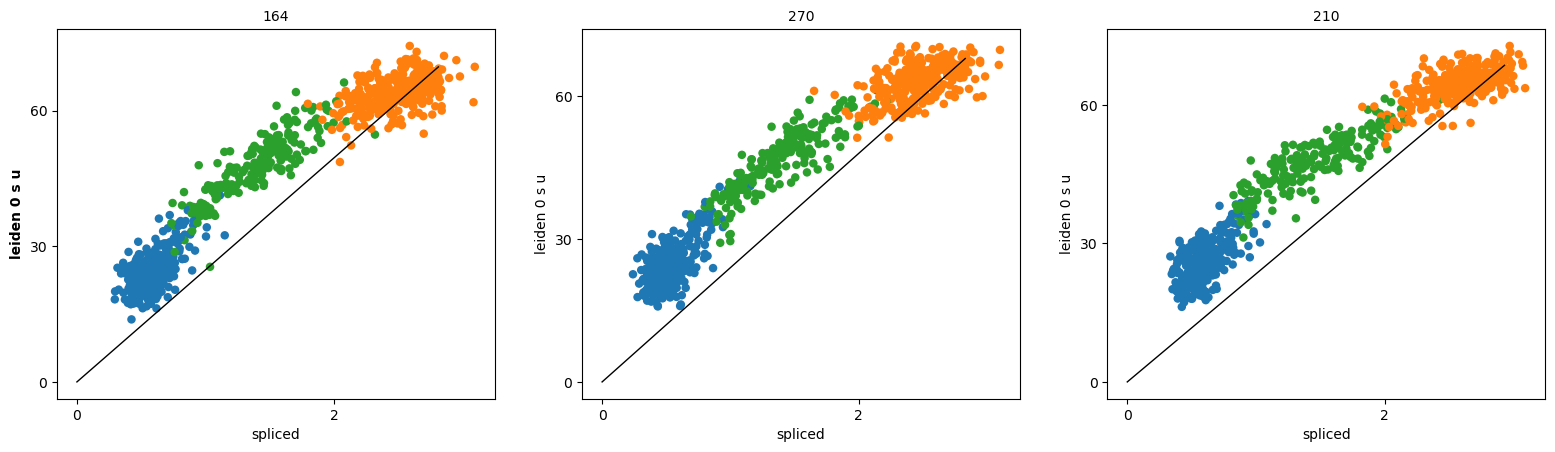

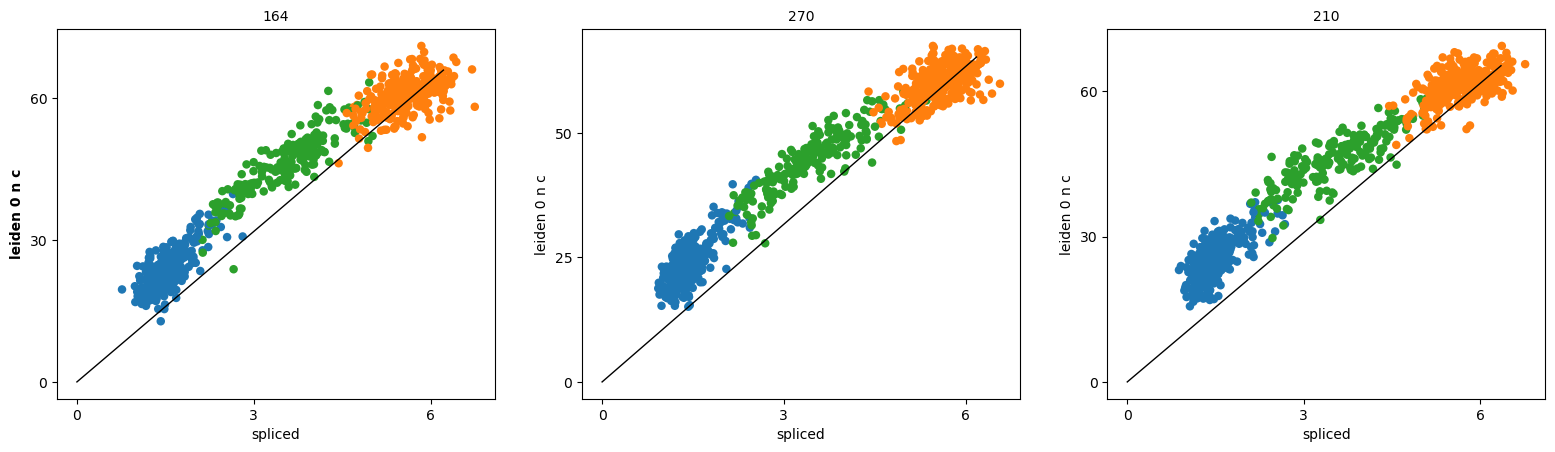

In [38]:
scv.pl.scatter(adata_dict['adata_n_c_800obs_300genes_deterministic'], dfn['1'][:3], ylabel='leiden 0 s_u', color='leiden')
scv.pl.scatter(adata_dict['adata_s_u_800obs_300genes_deterministic'], dfn['1'][:3], ylabel='leiden 0 n_c', color= 'leiden')

In [39]:
keys = ['velocity_length', 'velocity_confidence']
df = adata_dict['adata_n_c_800obs_300genes_deterministic'].obs.groupby('leiden')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

leiden,0,1,2
velocity_length,25.312098,25.589228,26.700304
velocity_confidence,0.292772,0.146168,0.346164


In [40]:
keys = ['velocity_length', 'velocity_confidence']
df = adata_dict['adata_s_u_800obs_300genes_deterministic'].obs.groupby('leiden')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

leiden,0,1,2
velocity_length,25.919476,25.701477,27.104111
velocity_confidence,0.331179,0.231966,0.402148


# True Velocity cosine similarity 

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
def compute_cosine_similarity(true_velocities, estimated_velocities):
    n_genes = true_velocities.shape[1]
    cosine_similarities = np.zeros(n_genes)

    for i in range(n_genes):
        true_v = true_velocities[:, i]
        est_v = estimated_velocities[:, i]

        true_v = true_v.reshape(1, -1)
        est_v = est_v.reshape(1, -1)

        cos_sim = cosine_similarity(true_v, est_v)[0][0]

        cosine_similarities[i] = cos_sim

    return cosine_similarities

In [97]:
true_velocity = adata_dict['adata_s_u_1000obs_300genes_dynamical'].layers['true_velocity']
velocity = adata_dict['adata_s_u_1000obs_300genes_dynamical'].layers['velocity']
velocity_filtered = velocity[:, ~np.isnan(velocity).any(axis=0)]
true_velocity_filtered =  true_velocity[:, ~np.isnan(velocity).any(axis=0)]

velocity_filtered.shape

(1000, 107)

In [98]:
compute_cosine_similarity( velocity_filtered, true_velocity_filtered).mean()

0.6922276321674349